# IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Alternatively, you can use the same dataset made readily available by keras Using the following lines of code:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


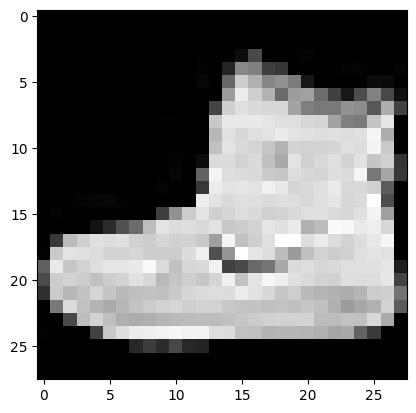

In [3]:
plt.imshow(X_train[0], cmap="gray")

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

# PERFORM DATA VISUALIZATION

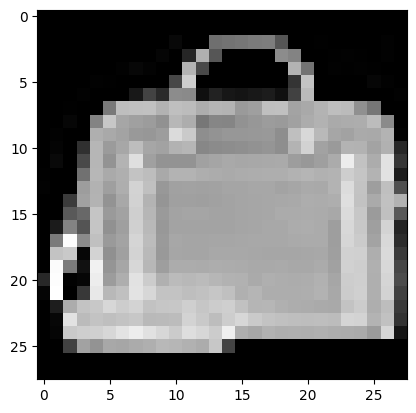

In [6]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image

In [7]:
label = y_train[i]
label


8

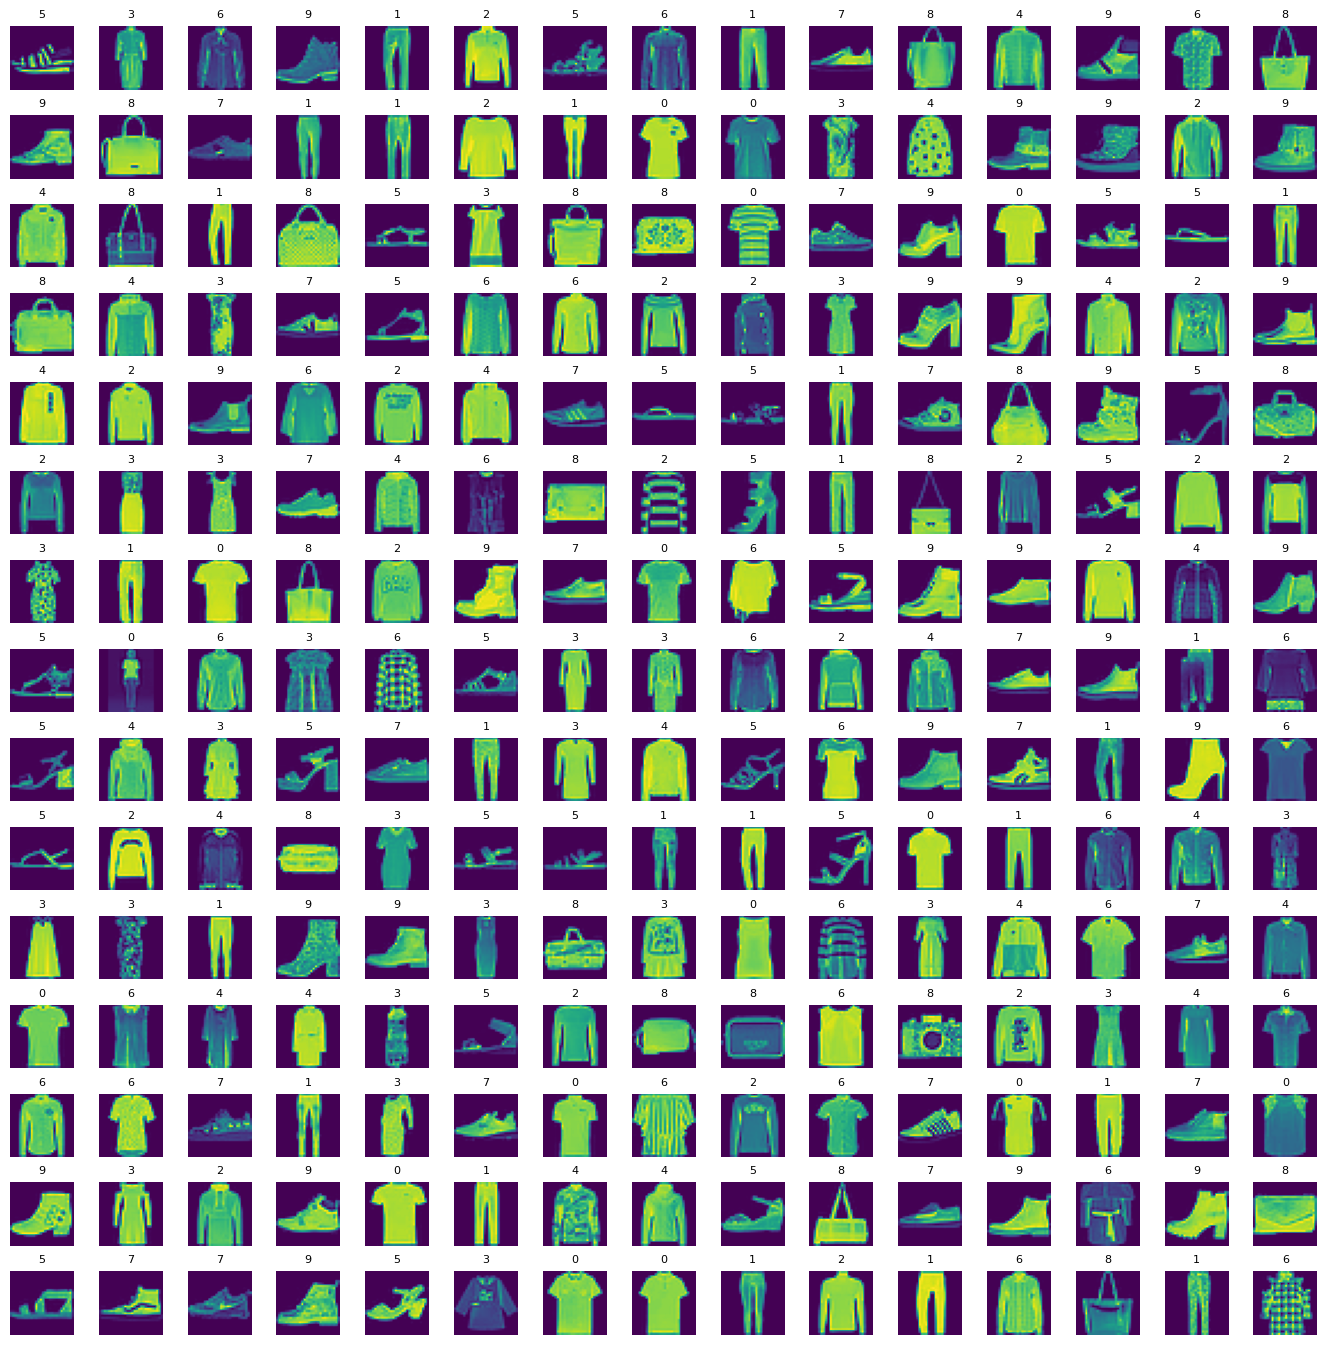

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# PERFORM DATA PREPROCESSING

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [11]:
noise_dataset = np.array(noise_dataset)

In [12]:
noise_dataset.shape

(60000, 28, 28)

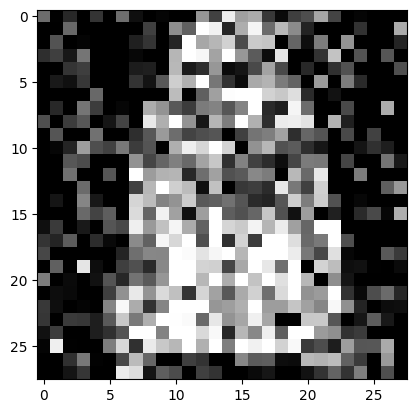

In [13]:
plt.imshow(noise_dataset[22], cmap="gray")

In [14]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)

noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 28, 28)

# BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [22]:
# Adjusted Autoencoder Architecture
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", activation='relu'))

# Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same", activation='relu'))

# Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation='relu'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu', padding="same"))
autoencoder.add(tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='sigmoid', padding="same"))

In [23]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 28, 28, 32)        4640      
 Transpose)                                                      
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 1)        

In [24]:
# Training with adjusted parameters
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs=20,  # Increase epochs
                batch_size=128,  # Adjust batch size
                validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))


Epoch 1/20
469/469 [==============================] - 8s 8ms/step - loss: 0.3469 - val_loss: 0.2976
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2920 - val_loss: 0.2915
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2881 - val_loss: 0.2900
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2864 - val_loss: 0.2878
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2852 - val_loss: 0.2868
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2843 - val_loss: 0.2867
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2837 - val_loss: 0.2856
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2830 - val_loss: 0.2849
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2825 - val_loss: 0.2847
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2818 - val_loss: 0.2837

# EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
# Evaluate
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

In [36]:
predicted = autoencoder.predict(noise_test_set[:11].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 227ms/step


In [37]:
predicted.shape

(11, 28, 28, 1)

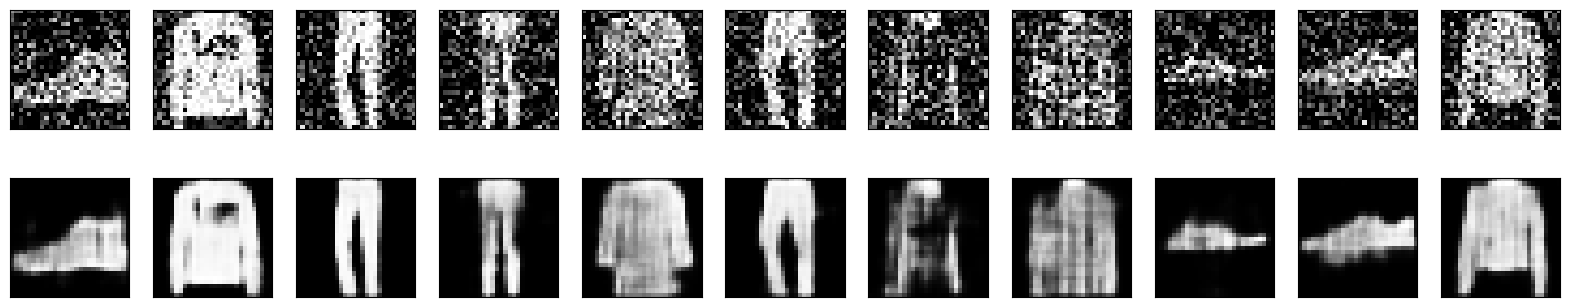

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=11, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:11], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)